I COPIED THIS EXAMPLE FROM THIS FINE BOOK

Title:   Scientific Visualisation - Python & Matplotlib  
Author:  Nicolas P. Rougier  
License: BSD  

# Contour with drop shadows


In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.patheffects import Stroke, Normal
from scipy.ndimage import gaussian_filter

In [18]:
# Some data
n = 64
X, Z = np.meshgrid(
    np.linspace(-0.5 + 0.5 / n, +0.5 - 0.5 / n, n),
    np.linspace(-0.5 + 0.5 / n, +0.5 - 0.5 / n, n),
)
Y = 0.75 * np.exp(-10 * (X ** 2 + Z ** 2))


def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-(x ** 2) - y ** 2)


x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = 0.5 * f(X, Y)

n = 11  # Number of levels
dz = (Z.max() - Z.min()) / n
levels = np.linspace(Z.min(), Z.max(), n, endpoint=True)
cmap = plt.get_cmap("viridis")

In [19]:
def drop_shadow(Z, l0, l1, sigma=5, alpha=0.5):
    """Compute the drop shadow for a contour between l0 and l1.

    This works by first:
    1. render the contour in black using an offline image
    2. blue the contour using a Guassian filter
    3. set the alpha channel accordingly
    """
    fig = Figure(figsize=(5, 5))
    canvas = FigureCanvas(fig)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False)
    ax.contourf(
        Z,
        vmin=Z.min(),
        vmax=Z.max(),
        levels=[l0, l1],
        origin="lower",
        colors="black",
        extent=[-1, 1, -1, 1],
    )
    ax.set_xlim(-1, 1), ax.set_ylim(-1, 1)
    canvas.draw()
    A = np.array(canvas.renderer.buffer_rgba())[:, :, 0]
    del fig
    A = gaussian_filter(A, sigma)
    A = (A - A.min()) / (A.max() - A.min())
    I = np.zeros((A.shape[0], A.shape[1], 4))
    I[:, :, 3] = (1 - A) * alpha
    return I

Text(0.5, 1.0, 'Shaded Contour')

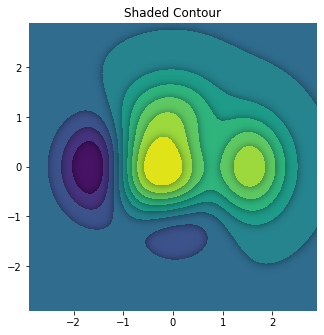

In [20]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)

zorder = -100
for i in range(len(levels) - 1):
    l0, l1 = levels[i], levels[i + 1]
    I = drop_shadow(Z, l0, l1)
    ax.imshow(I, extent=[-3, 3, -3, 3], origin="upper", zorder=zorder)
    zorder += 1
    ax.contourf(
        Z,
        vmin=Z.min(),
        vmax=Z.max(),
        levels=[l0, l1],
        origin="lower",
        cmap=cmap,
        extent=[-3, 3, -3, 3],
        zorder=zorder,
    )
    zorder += 1
ax.set_xlim(-2.9, 2.9)
ax.set_ylim(-2.9, 2.9)
ax.set_title("Shaded Contour")


Text(0.5, 1.0, 'Regular Contour')

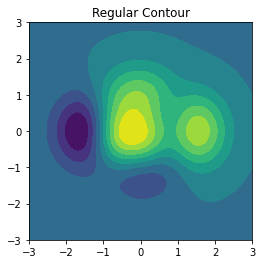

In [21]:
plt.figure(figsize=(4, 4))
plt.contourf(X,Y,Z, levels=levels)
plt.title("Regular Contour")